In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_long_from_analysis,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave,plot_single_plate
import matplotlib.patches as mpatches
import statsmodels.api as sm
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.io as sio
import matplotlib as mpl
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.legend_handler import HandlerTuple
from amftrack.util.plot import gridplot
import logging
logging.getLogger().setLevel(logging.WARNING)
# plt.style.use('presentation.mplstyle')

%matplotlib widget

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [14]:
plates = ["28_20230227","12_20220502","229_20230330", '1045_20220504',"206_20230303",
"3_20220426",
"202_20230314",
"218_20230227",
"219_20230307",'1014_20220525', '1023_20220502','1042_20220523','1053_20220413','1076_20220511','127_20220705',"480_20221205","91_20220708"]

In [15]:
all_analysis_folders = get_analysis_folders()

analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)

In [5]:
time_plate_info["tot_biovolume_study"]

Index(['num_trunks', 'area', 'area_sep_comp', 'num_tips', 'num_nodes',
       'area_study', 'num_tips_study', 'num_nodes_study', 'num_edges_study',
       'tot_length', 'tot_length_study', 'out_study', 'mean_straightness',
       'spore_volume', 'num_spores', 'tot_biovolume_study', 'tot_biovolume',
       'date', 'Plate', 'path_exp', 'folder_analysis', 'time_since_begin',
       'time_since_begin_h', 'timestep', 'folder', 'unique_id', 'datetime',
       'PrincePos', 'root', 'strain', 'medium',
       'ring_biovolume_density_incr-100_index-0',
       'ring_biovolume_density_incr-100_index-1',
       'ring_biovolume_density_incr-100_index-2',
       'ring_biovolume_density_incr-100_index-3',
       'ring_biovolume_density_incr-100_index-4',
       'ring_biovolume_density_incr-100_index-5',
       'ring_biovolume_density_incr-100_index-6',
       'ring_biovolume_density_incr-100_index-7',
       'ring_biovolume_density_incr-100_index-8',
       'ring_biovolume_density_incr-100_index-9',
 

In [6]:
time_plate_info

,num_trunks,area,area_sep_comp,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length,tot_length_study,...,time_since_begin_h,timestep,folder,unique_id,datetime,PrincePos,root,strain,medium,num_edges_study
0,3,589.888135,39.748732,38,354,145.904085,34,280,9.719173e+04,8.847354e+04,...,0.000000,0,20220504_1900_Plate02,104520220504,2022-05-04 19:00:00,2,'Carrot','C2','001P100N200C',NaN
1,3,1783.927716,51.135736,53,307,166.937371,41,227,1.098288e+05,9.645266e+04,...,2.000000,1,20220504_2100_Plate02,104520220504,2022-05-04 21:00:00,2,'Carrot','C2','001P100N200C',NaN
2,3,613.959788,62.284723,43,320,182.667626,36,258,1.202686e+05,1.092034e+05,...,4.000000,2,20220504_2300_Plate02,104520220504,2022-05-04 23:00:00,2,'Carrot','C2','001P100N200C',NaN
3,3,622.553392,81.433697,47,320,197.904675,42,275,1.324534e+05,1.227137e+05,...,6.000000,3,20220505_0100_Plate02,104520220504,2022-05-05 01:00:00,2,'Carrot','C2','001P100N200C',NaN
4,3,637.317152,94.778875,53,334,214.321216,49,287,1.438345e+05,1.354835e+05,...,8.000000,4,20220505_0300_Plate02,104520220504,2022-05-05 03:00:00,2,'Carrot','C2','001P100N200C',NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,3,1574.019865,956.057853,2206,22979,1154.399427,1741,7810,3.353183e+06,2.640284e+06,...,827.083333,182,20220531_0604_Plate32,320220426,2022-05-31 06:04:00,32,'Carrot','Agg','001P100N100C-T',10654.0
2774,3,1656.971108,1132.994747,3472,46905,1228.617993,2865,19996,6.447003e+06,5.589403e+06,...,973.550000,183,20220606_0832_Plate32,320220426,2022-06-06 08:32:00,32,'Carrot','Agg','001P100N100C-T',29436.0
2775,3,1657.181013,1133.286797,3513,45912,1235.796660,2898,19614,6.359485e+06,5.523587e+06,...,981.566667,184,20220606_1633_Plate32,320220426,2022-06-06 16:33:00,32,'Carrot','Agg','001P100N100C-T',28824.5
2776,3,1597.640178,1131.923160,3305,41739,1228.183718,2743,17489,5.890895e+06,5.107504e+06,...,989.566667,185,20220607_0033_Plate32,320220426,2022-06-07 00:33:00,32,'Carrot','Agg','001P100N100C-T',25438.0


(0.0, 200.0)

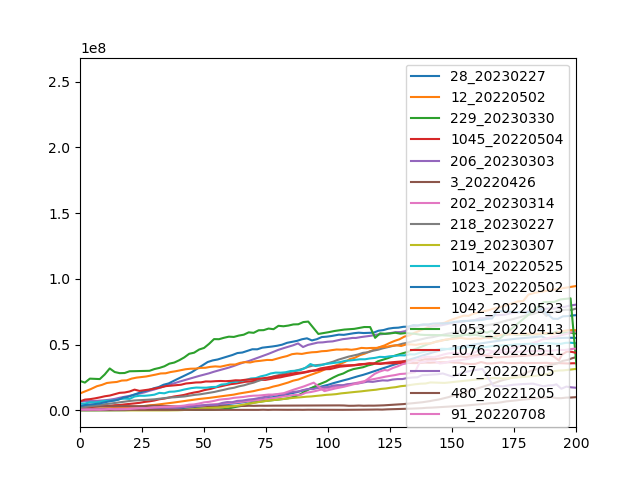

In [16]:
Ds={}
fig,ax = plt.subplots()

for plate in plates:
    select = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)]
    # Ds[plate] = select["density"].iloc[timestep[int(plate.split('_')[0])]]
    ax.plot(select["time_since_begin_h"],select["tot_biovolume_study"],label = plate)
ax.legend()
ax.set_xlim(0,200)
    # break

(0.0, 200.0)

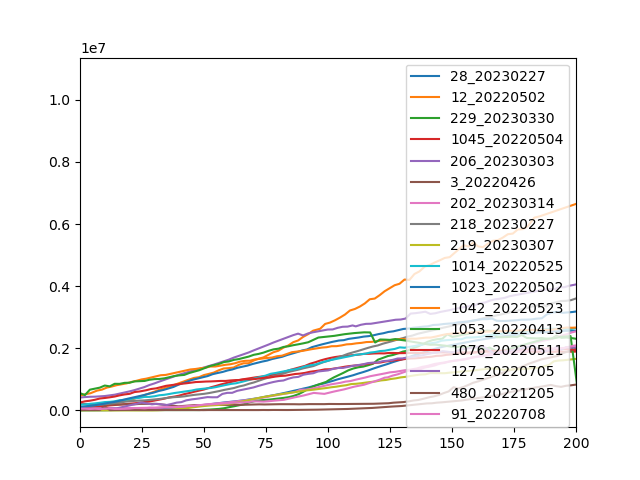

In [17]:
fig,ax = plt.subplots()

for plate in plates:
    
    select = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)]
    # Ds[plate] = select["density"].iloc[timestep[int(plate.split('_')[0])]]
    ax.plot(select["time_since_begin_h"],select["tot_length_study"],label = plate)
ax.legend()
ax.set_xlim(0,200)